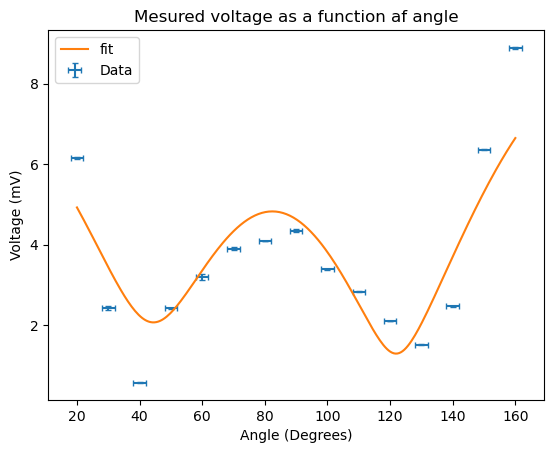

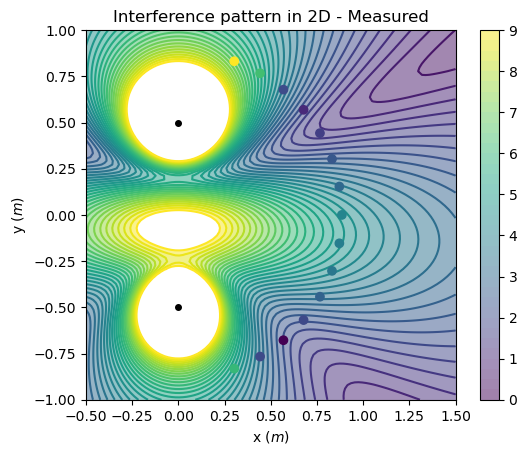

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lmfit as lm

# Defining varibles and functions:
N = 100
cm = 1/2.54
max_value = 9

a_1 = 0
a_2 = 0
b_1 = 0.5
b_2 = -b_1
Amp = 3
A = [a_1, a_2]
B = [b_1, b_2]
lim_x_lower = -0.5
lim_x_upper = 1.5
lim_y_lower = -1
lim_y_upper = -lim_y_lower

f = 343
lam = 343/f
k = 2*np.pi/lam

def I_rms(varibles, x, y):
    C = varibles['C']
    Amp_1 = varibles['Amp_1']
    theta = varibles['theta']
    r1 = np.sqrt((x - a_1)**2 + (y - b_1)**2)
    r2 = np.sqrt((x - a_2)**2 + (y - b_2)**2)
    A1 = Amp_1/(r1 + 1e-5)
    A2 = Amp_1/(r2 + 1e-5)
    delta_r = r1 - r2
    phi = delta_r/lam
    I = np.sqrt(A1**2/2 + A2**2/2 + A1*A2*np.cos(2*np.pi*phi/C + theta))
    return I

def fit(varibles, x, y, V, uncertainties):
    I_theory = I_rms(varibles, x, y)
    return (V - I_theory)**2/uncertainties
    
# Importing data
Data = np.genfromtxt('Filer til 2D-map\Extat - Projekt - Labdag 2 - 2D map.csv', delimiter = ';', skip_header = 1, skip_footer = 2)
angles = Data[:, 0]
Vs = Data[:, 1]
error = Data[:, 2]*10**-3 # Adjust uncertainties
error_angles = np.ones(angles.size)*2

R = 0.885

xs_data = np.sin(np.pi*angles/180)*R
ys_data = np.cos(np.pi*angles/180)*R

# Fitting

Varibles = lm.Parameters()
Varibles.add('C', value = 1.3)
Varibles.add('Amp_1', value = Amp)
Varibles.add('theta', value = 0, min = 0, max = 2*np.pi)

V_fit = lm.minimize(fit, Varibles, args = (xs_data, ys_data, Vs, error))

# Plotting data
thetas_plot = np.linspace(20, 160, 250)
xs_plot = np.sin(thetas_plot*np.pi/180)*R
ys_plot = np.cos(thetas_plot*np.pi/180)*R


fig, ax = plt.subplots()
ax.errorbar(angles, Vs, yerr = error, xerr = error_angles, linestyle = '', capsize = 2, label = 'Data')
ax.plot(thetas_plot, I_rms(V_fit.params, xs_plot, ys_plot), label = 'fit')
ax.set_xlabel('Angle (Degrees)')
ax.set_ylabel('Voltage (mV)')
ax.set_title('Mesured voltage as a function af angle')
ax.legend()
plt.savefig('Eksperiment om 2D-map - Data.png')
plt.show()

xs_plot = xs_plot[::-1]
ys_plot = ys_plot[::-1]
Vs = Vs[::-1]

# Defining theoretical data:
xs = np.linspace(lim_x_lower, lim_x_upper, N)
ys = np.linspace(lim_y_lower, lim_y_upper, N)
xm, ym = np.meshgrid(xs, ys)
wave = I_rms(V_fit.params, xm, ym)
wave = wave[::-1]

# Making plot
fig, ax = plt.subplots()
levels = np.arange(0, max_value + 0.25, 0.25)

cmap = 'viridis'

ax.contour(xm, ym, wave, levels = levels)
color_map = ax.contourf(xm, ym, wave, levels = levels, alpha = 0.5, cmap = cmap)


ax.plot(A, B, marker = 'o', zorder = 40, color = 'k', linestyle = '', markersize = 4)


ax.scatter(xs_data, ys_data, c = Vs, zorder = 80, cmap = cmap) # Plotting our data

fig.colorbar(color_map, ax = ax)
ax.set_xlabel('x $(m)$')
ax.set_ylabel('y $(m)$')
ax.set_title('Interference pattern in 2D - Measured')
ax.set_aspect('equal')
plt.savefig('Eksperiment om 2D.png')
plt.show()

In [2]:
V_fit